In [1]:
import pandas as pd
import numpy as np 
import re


from collections import Counter

from wordcloud import WordCloud
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#caricamento file

df = pd.read_csv('videolist_search500_2021_11_11-21_27_43.tab',sep='\t')

In [4]:
df.columns

Index(['position', 'channelId', 'channelTitle', 'videoId', 'publishedAt',
       'publishedAtSQL', 'videoTitle', 'videoDescription', 'tags',
       'videoCategoryId', 'videoCategoryLabel', 'duration', 'durationSec',
       'dimension', 'definition', 'caption', 'thumbnail_maxres',
       'licensedContent', 'viewCount', 'likeCount', 'dislikeCount',
       'favoriteCount', 'commentCount'],
      dtype='object')

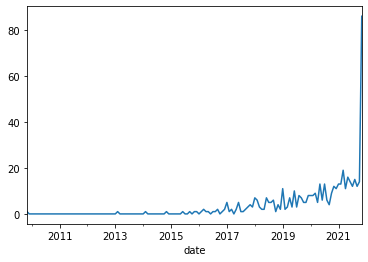

In [5]:
#riconoscimento date

df['date'] = pd.to_datetime(df['publishedAtSQL'], errors='coerce')
df.set_index(df['date'],inplace=True)



df_t = df.resample('M')['videoId'].count().plot()

In [6]:
#titoli canali

df['channelTitle'].value_counts().head(10)

avantgardevegan       56
Goodful               47
Tasty                 19
Pick Up Limes         18
Rainbow Plant Life    18
The Happy Pear        13
Make It Dairy Free     9
BOSH.TV                8
SweetPotatoSoul        8
Gordon Ramsay          8
Name: channelTitle, dtype: int64

In [8]:
# quante view per canale 

view_piv = pd.pivot_table(df, index='channelTitle',values='viewCount', aggfunc=sum).sort_values(by = 'viewCount', ascending=False)


# estrae un csv

view_piv.to_csv('views_channel.csv')

In [9]:

view_piv.head(10)

,viewCount
channelTitle,
Gordon Ramsay,55352019.0
Pick Up Limes,34552186.0
avantgardevegan,29045599.0
Goodful,28126254.0
Tasty,11725370.0
HiHo Kids,9213459.0
The Try Guys,8765577.0
Munchies,8532519.0
AsapSCIENCE,7172592.0


<AxesSubplot:xlabel='channelTitle'>

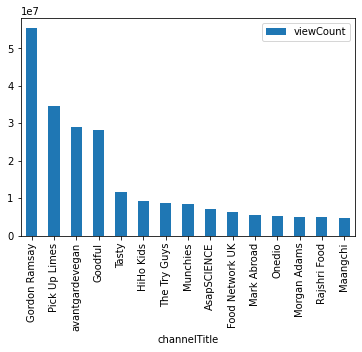

In [10]:
#plotta i primi 15 (con barre)

view_piv.head(15).plot(kind='bar')

<AxesSubplot:xlabel='channelTitle'>

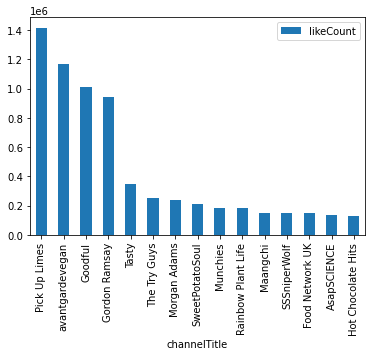

In [12]:
# calcola e plotta i primi per likes 
likes_piv = pd.pivot_table(df, index='channelTitle',values='likeCount', aggfunc=sum).sort_values(by = 'likeCount', ascending=False)

#scrive su csv
likes_piv.to_csv('likes_channel.csv')

likes_piv.head(15).plot(kind='bar')

<AxesSubplot:xlabel='channelTitle'>

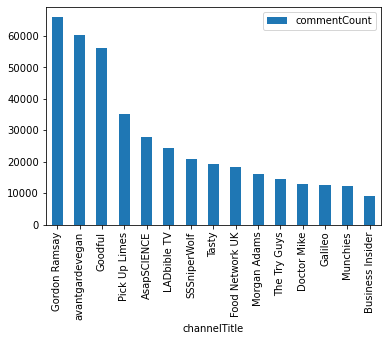

In [13]:
# conta commenti

comm_piv = pd.pivot_table(df, index='channelTitle',values='commentCount', aggfunc=sum).sort_values(by = 'commentCount', ascending=False)


#csv

comm_piv.to_csv('comm_channel.csv')

#plotta a barre

comm_piv.head(15).plot(kind ='bar')

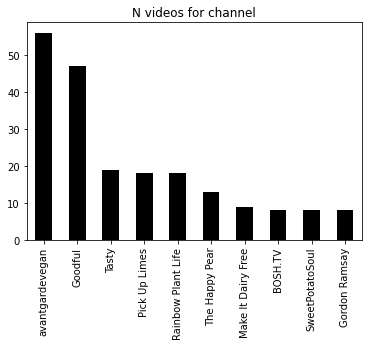

In [15]:
#conta video per canale

nvid = df['channelTitle'].value_counts()

#plot
nvid.head(10).plot(kind='bar', color='black', title='N videos for channel')

nvid.to_csv('videos_per_channel.csv')

In [16]:
#crea cloud delle tag

tags = df.tags.value_counts().index.tolist()

all_tags= []

for t in tags:
    t_l = t.split(',')
    all_tags.extend(t_l)

c = Counter(all_tags)

wordcloud = WordCloud(width = 600, height = 1000, 
                background_color ='Black',
                colormap='Blues',
                max_words=1000,
                prefer_horizontal =0.99,
                relative_scaling=0.21,
                stopwords = [], 
                min_font_size = 10).generate_from_frequencies(c)

In [17]:
c.most_common(20)

[('vegan', 226),
 ('food', 110),
 ('plant based', 105),
 ('vegan recipes', 105),
 ('cooking', 81),
 ('vegetarian', 81),
 ('vegan food', 64),
 ('KtKp', 62),
 ('K_fe', 56),
 ('easy vegan recipes', 53),
 ('gaz oakley', 47),
 ('vegan recipe', 43),
 ('vegan cooking', 43),
 ('avantgardevegan', 42),
 ('veganism', 42),
 ('chef', 41),
 ('what i eat in a day', 40),
 ('vegan meals', 37),
 ('vegan what i eat in a day', 34),
 ('recipe', 34)]

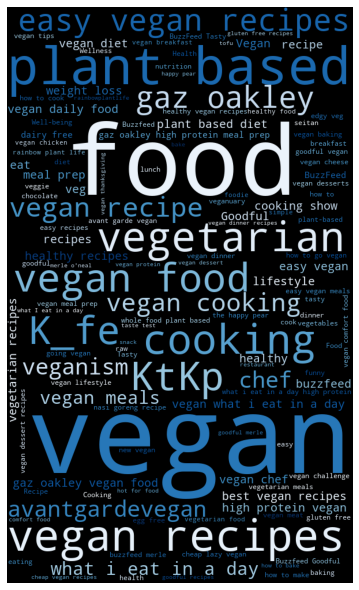

In [18]:

plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 

plt.show()

<AxesSubplot:>

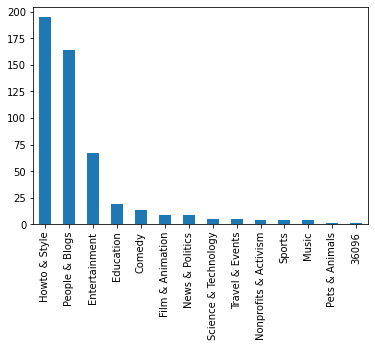

In [19]:
vc = df.videoCategoryLabel.value_counts()

vc.head(15).plot(kind='bar')

In [20]:
#labels per anno

df['year'] = df['date'].dt.year
years = df.year.dropna().unique().tolist()
label_year = df.groupby('year')['videoCategoryLabel'].value_counts()

/tmp/ipykernel_166412/4220569803.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[j, i].set_xticklabels(label_year[years[p]].index, rotation = 45, ha="right")


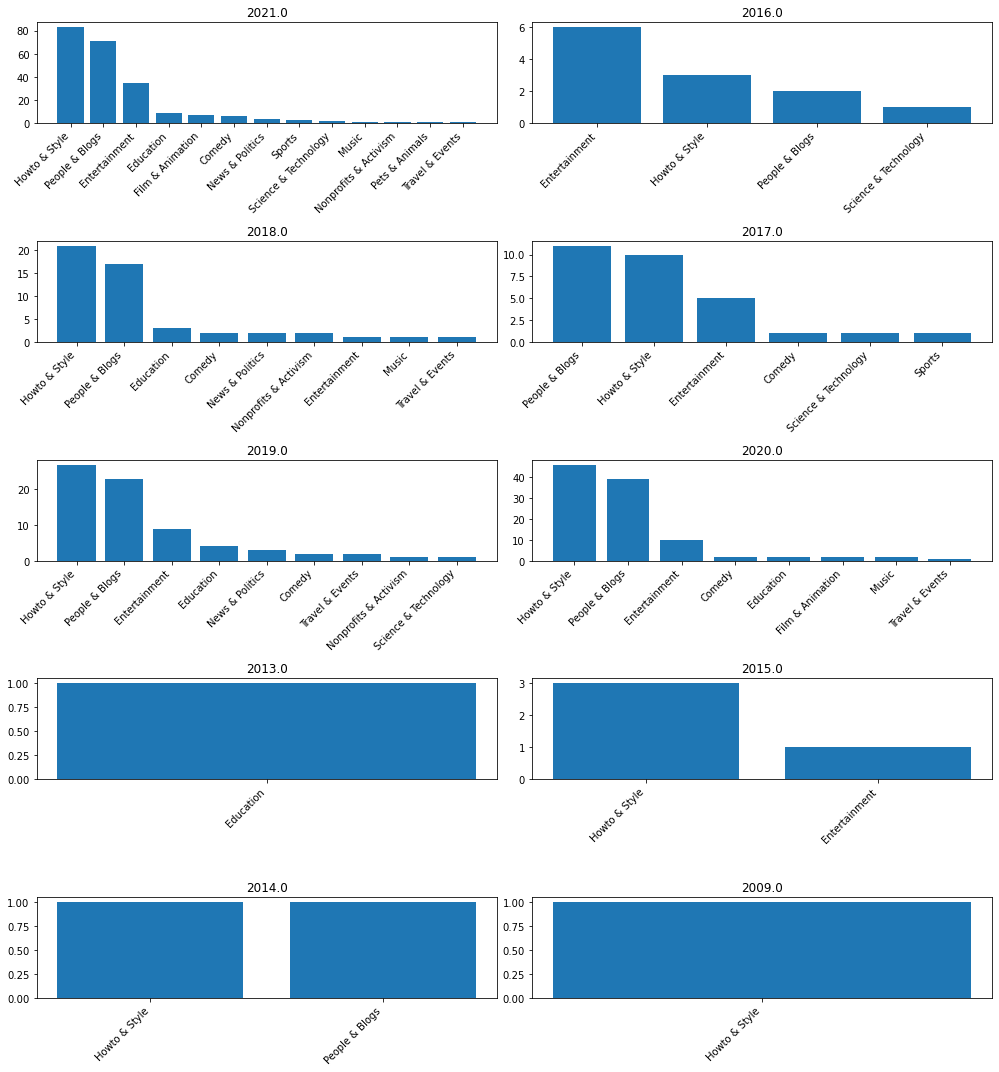

In [21]:
nrows= int(len(years)/2)
ncols = 2

fig, ax = plt.subplots(nrows, ncols, figsize=(14,15))

p=0
for j in range(nrows):

    for i in range(ncols):

      ax[j, i].bar(label_year[years[p]].index,label_year[years[p]])
      ax[j, i].set_title(years[p])
      ax[j, i].set_xticklabels(label_year[years[p]].index, rotation = 45, ha="right")
      p=p+1

fig.tight_layout()
